# Assignment 2 - Customer Churn/Attrition

#### Enosh Nyarige - Machine Learning

In [672]:
import pandas as pd
pd.set_option("display.max_columns", 50)
import numpy as np
seed = 515
np.random.seed(seed)
import seaborn as sns

##### Load dataset

In [673]:
df = pd.read_csv('churn.csv')
# df.isnull().sum()
# df.info()

### Relevant features that show areas churning happen most


In [674]:
def display_plot(dataset, col_to_exclude, object_mode = True):
    """ 
     This function plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
       
     Return
       No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
                
                
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
     
    
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                sns.countplot(df[this[n]], ax=ax[row][col])
                
            else:
                sns.distplot(df[this[n]], ax = ax[row][col])
            
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1

    plt.show();
    return None


##### Some of the columns have no defined services, that is; MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

Convert the "No service" values to "No"

In [675]:
def convert_no_service (df):
    col_to_transform = []
    for col in df.columns:
        if (df[col].dtype == 'O') & (col != 'customerid'):
            if len(df[df[col].str.contains("No")][col].unique()) > 1:
                col_to_transform.append(col)
    
    print("Total column(s) to transform: {}".format(col_to_transform))
    for col in col_to_transform:
        df.loc[df[col].str.contains("No"), col] = 'No'
        
    return df

In [676]:
df = convert_no_service(df)

Total column(s) to transform: ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


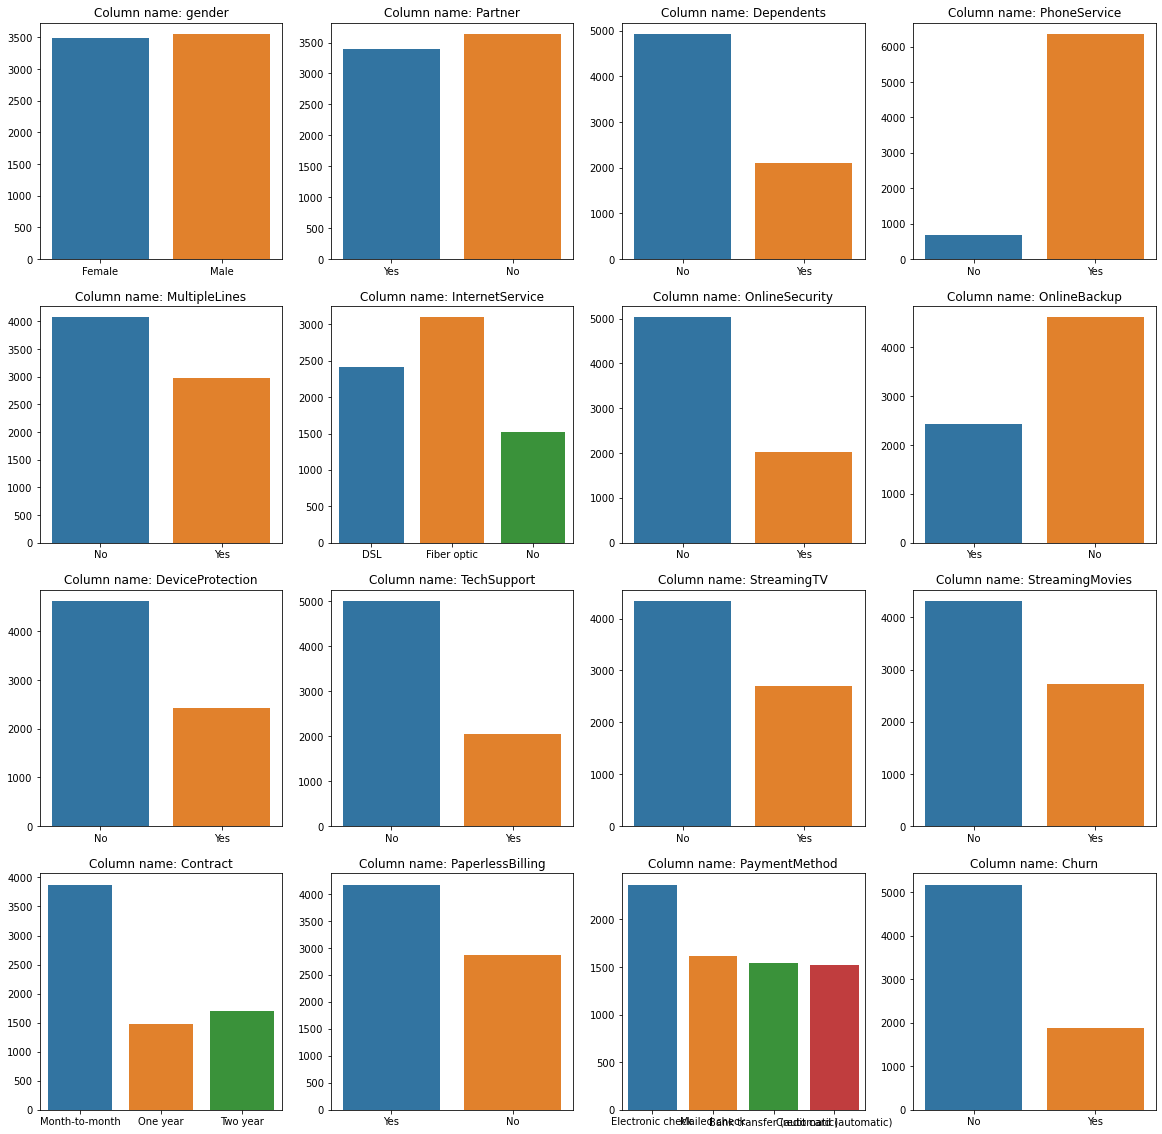

In [677]:
display_plot(df, 'customerID', object_mode = True)

## Encode the columns with text fields for data analysis
##### For the gender, its just male and female, hence two streams for the dictionary

In [678]:
df.gender = df.gender.map(dict(Male=1, Female=0))
display(df.gender.value_counts())

1    3555
0    3488
Name: gender, dtype: int64

###### Some features have more than 2 streams(3), and their conversion to integers can be combined

In [679]:
def encode_yes_no (df, columns_to_encode):
    for col in columns_to_encode:
        df[col] = df[col].map(dict(Yes = 1, No = 0))
        
    return df
encode_columns = []
for col in df.columns:
    keep = np.sort(df[col].unique(), axis = None)
    
    if ("Yes" in keep) & ("No" in keep):
        encode_columns.append(col)

del keep
print("Encode Columns Yes/No: {}".format(encode_columns))

Encode Columns Yes/No: ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


<ipython-input-679-8d5e49a9c8c8>:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ("Yes" in keep) & ("No" in keep):


In [680]:
df = encode_yes_no(df, encode_columns)
# display(df.head(5))

##### Fill default dummies for the columns with data that has not been encoded

In [681]:
df = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'], prefix = ['ISP', 'contract', 'payment'])
# df.head(5)

### Empty fields

The "TotalCharges" feature has 11 null values and is the only feature with null values. Dropping the rows with null values in the dataset will not affect the whole functionality

In [682]:
df.dropna(inplace = True)

#### Drop the columns that will not help in making the prediction on the churn rate. In this case, the customerID feature.

In [683]:
df2 = df.drop('customerID', axis = 1, inplace = False)
df2.columns = df2.columns.str.replace(" ", "_")

# df2.head()

### Correlation of the features

##### Arrange the correlation in an ascending order

In [684]:
df2.corr()['Churn'].sort_values(ascending=False)

Churn                                1.000000
contract_Month-to-month              0.404565
ISP_Fiber_optic                      0.307463
payment_Electronic_check             0.301455
MonthlyCharges                       0.192858
PaperlessBilling                     0.191454
SeniorCitizen                        0.150541
StreamingTV                          0.063254
StreamingMovies                      0.060860
MultipleLines                        0.040033
PhoneService                         0.011691
gender                              -0.008545
DeviceProtection                    -0.066193
OnlineBackup                        -0.082307
payment_Mailed_check                -0.090773
payment_Bank_transfer_(automatic)   -0.118136
ISP_DSL                             -0.124141
payment_Credit_card_(automatic)     -0.134687
Partner                             -0.149982
Dependents                          -0.163128
TechSupport                         -0.164716
OnlineSecurity                    

##### Correlation graph 

In [685]:
# corr = df2.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# f, ax = plt.subplots(figsize=(16, 10))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.6, cbar_kws={"shrink": .5})
# plt.show();

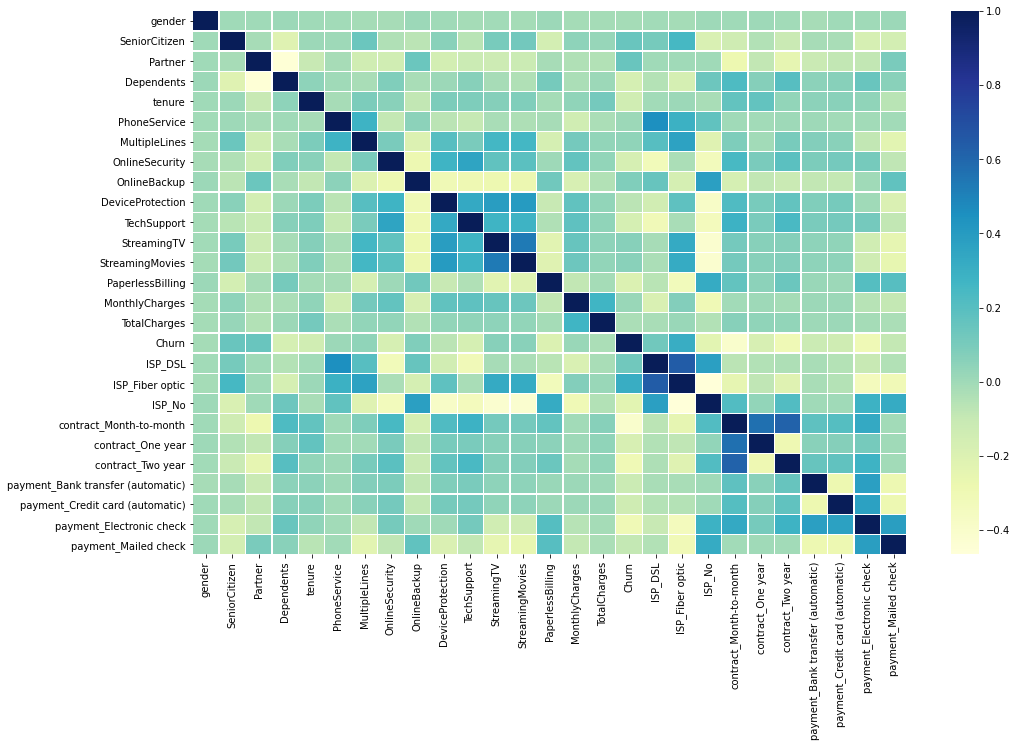

In [686]:
plt.figure(figsize=(16, 10))
df.drop(['customerID'],
        axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

## Prepare the model

##### Train and test models

In [687]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_recall_fscore_support
import pickle
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer

###### Split the dataset such that the training dataset is 80%

In [688]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, auc


In [689]:
X = df2.drop('Churn', axis = 1, inplace = False)
y = df2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)


### Fitting the data

The model can be adjusted with the params such as the learning rate from the learning dataset as a way of increasing its performance. This is especially if the model is **overfitting** or **underfitting**

In [690]:
import xgboost
from sklearn.metrics import mean_squared_error

In [691]:
if xgboost is not None: 
    best_xgb = xgboost.XGBRegressor(random_state=42)
    best_xgb.fit(X_train, y_train)
    y_pred = best_xgb.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    print("Validation MSE:", val_error)

Validation MSE: 0.14437259486278253


In [692]:
best_xgb = XGBClassifier(
    learning_rate = 0.2,
    max_depth = 4,
    n_estimators = 20,
    n_jobs = 4
    )

best_xgb.fit(
    X_train, y_train, eval_metric = xgb_f1, 
    eval_set = [(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds = 20)

y_pred = best_xgb.predict(X_test)
val_error = mean_squared_error(y_test, y_pred)
print("\nValidation MSE:", val_error)

[0]	validation_0-error:0.20729	validation_1-error:0.21038	validation_0-f1:0.00000	validation_1-f1:0.00000
Multiple eval metrics have been passed: 'validation_1-f1' will be used for early stopping.

Will train until validation_1-f1 hasn't improved in 20 rounds.
[1]	validation_0-error:0.20747	validation_1-error:0.20967	validation_0-f1:0.18794	validation_1-f1:0.22651
[2]	validation_0-error:0.20391	validation_1-error:0.20043	validation_0-f1:0.18794	validation_1-f1:0.22651
[3]	validation_0-error:0.19929	validation_1-error:0.20327	validation_0-f1:0.22761	validation_1-f1:0.22749
[4]	validation_0-error:0.19947	validation_1-error:0.20114	validation_0-f1:0.33192	validation_1-f1:0.36555
[5]	validation_0-error:0.19822	validation_1-error:0.20043	validation_0-f1:0.34280	validation_1-f1:0.37838
[6]	validation_0-error:0.19769	validation_1-error:0.20256	validation_0-f1:0.37659	validation_1-f1:0.40882
[7]	validation_0-error:0.19733	validation_1-error:0.20256	validation_0-f1:0.38755	validation_1-f1:0.426

##### Extreme Gradient Boosting “XGBOOST” model

The AUC and the Accuracy score as well

In [693]:
print ("XGBOOST Classifier\n")

clf = XGBClassifier(n_jobs = 4)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print ("Accuracy Score: ", score, '\n\nAUC Score: {}\n\n'.format(roc_auc_score(y_test, pred), 3))

XGBOOST Classifier

Accuracy Score:  0.7953091684434968 

AUC Score: 0.7051230537418383




### Save the model to local machine

Create a file, open it in write mode to save the model

In [694]:
import pickle

with open('model_churn', 'wb') as f:
    pickle.dump(best_xgb, f)
# fileModelName = 'finalChurnModel.sav'
# pickle.dump(best_xgb, open(fileModelName, 'wb'))

### Load the model from the saved instance

Open the saved model in read mode

In [697]:
with open('model_churn', 'rb') as f:
    mp = pickle.load(f)
    
    
mp.score(X_test, y_test)

0.7896233120113717

#### Top 10 features that affect the churn rate

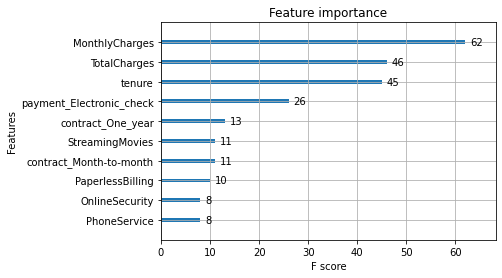

In [698]:
xgb.plot_importance(best_xgb, max_num_features = 10)
plt.show();

In [657]:
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)
print_evaluation_metric(y_test, y_pred)
get_confusion_matrix (y_test, y_pred, save=0, filename="this.csv")
# my_plot_roc_curve (y_test, y_prob, filename="ROC.png", dpi = 200)
# plot_evaluation_metric (y_test, y_prob)

Precision: [0.84200913 0.60576923]
Recall: [0.88229665 0.52209945]
F-score: [0.86168224 0.56083086]
Support: [1045  362]


,Predicted False,Predicted True
Actual False,922,123
Actual True,173,189


## Hosting the model

In [665]:
# import anvil.server

# anvil.server.connect("FZ7YRIILUT3XPJBTSH2SOZWO-UZG5MKHO5C42NCUI")

In [666]:
# import anvil.server

# anvil.server.connect("FZ7YRIILUT3XPJBTSH2SOZWO-UZG5MKHO5C42NCUI")

# @anvil.server.callable
# def predictChurn(churn):
#     print("\n\nAUC Score: {}\n\n", churn)
    
#     return ('')


# anvil.server.wait_forever()
